# **Dimensionality Reduction**
2023-01-17

## 1.1 Visualizing

사람은 기본적으로 머신러닝을 이해할 수 없다. 사람은 3차원 공간에서 살고 있는데 머신러닝에서는 다루는 차원의 수는 수 억이 넘는 차원을 가지고 있기도 하다. 그래서 매우 간단한 형태이더라도 차원의 수가 높아지면 이해할 수 없어진다. 

그래서 고차원 공간을 우리가 이해할 수 있는 저차원으로 변환하는 기술을 dimensionality reduction이라고 한다. 

## 1.2 MNIST


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', cache=False)


In [2]:
X = mnist.data.astype('float32').to_numpy()
y = mnist.target.astype('int64').to_numpy()

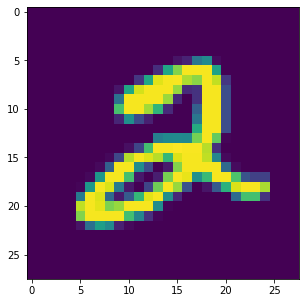

label : 2


In [3]:
plt.figure(figsize=(5,5))
idx = 5

grid_data = X[idx].reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none")
plt.show()

print('label : {}'.format(y[idx]))

각각의 이미지는 28 x 28 pixel들을 가지고 있기 때문에 $28 \times 28 = 784$ 차원의 벡터를 가지게 된다. 하지만 784차원의 공간에서 우리의 MNIST 가 차지하는 공간은 매우 작을 것이고 784 차원에는 매우매우 많은 벡터들이 존재한다.

<Figure size 432x288 with 0 Axes>

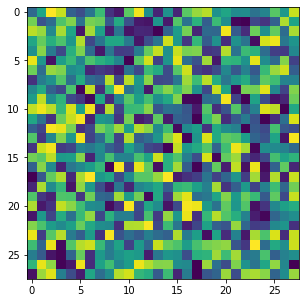

In [4]:
plt.clf()
plt.figure(figsize=(5,5))

rand_img = np.random.rand(28,28)
plt.imshow(rand_img)

plt.show()

## 1.3 2D Visualization using PCA

PCA 는 Principal Components Analysis 의 약자로, 데이터가 가장 많이 흩어져있는 축을 찾아서 그곳으로 사영해서 원하는 차원 개수만큼 줄이는 방법이다. 

데이터가 가장 많이 흩어져있는 축이라는 말은 가장 variance 가 커지게 하는 축이라는 말과 같다. 

### 1.3.1 PCA using Scikit-Learn


In [5]:
labels = y[:15000]
data = X[:15000]

print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


### z-score 정규화

In [7]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [8]:
sample_data = standardized_data

In [9]:
from sklearn import decomposition
pca = decomposition.PCA()

In [10]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


원래 데이터는 784차원이었지만 PCA를 통해서 2로 줄어었다.
각 라벨에 색을 부여해서 시각화

In [11]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


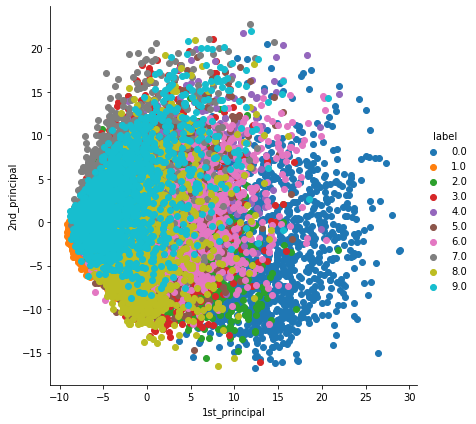

In [12]:
import seaborn as sn

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### 1.3.2 Implement PCA

eigen value와 eigen vector를 구하기 위한 공분산 행렬 계산

이미 z-score normalization을 해주었기 때문에 sample_data의 평균이 0이다. covariance matrix 를 구하는 식이 다음과 같다. 

$$Cov(X, X) = \text{E}\left(\left(X - \bar{X}\right)\left(X - \bar{X}\right)^\top\right) =\text{E}\left(XX^\top\right) $$

In [14]:
#find the co-variance matrix which is : A^T * A
# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [15]:
sample_data.mean()

7.635882e-10

#### eigh 함수를 통해서 eigen value와 eigen vector 구하기

In [17]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
#  num(eigval) = 784(메트릭스 linearly indep 여부는 이미 수직인 차원이기 때문에 고려하지 않아도 괜찮다.)
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


eigen vector를 축으로 우리의 데이터를 사영

In [18]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [19]:
labels.shape

(15000,)

In [20]:
import pandas as pd

# appending label to the 2d projected data(vertical stack)
new_coordinates = np.vstack((new_coordinates, labels.reshape(1,-1))).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())
#(0,1,2,3,4 are Xi other are principal axis)

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397793      -8.658155    0.0
2       9.640693      -2.082853    4.0
3      -3.356075       7.187464    1.0
4       2.979882       4.933888    9.0


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


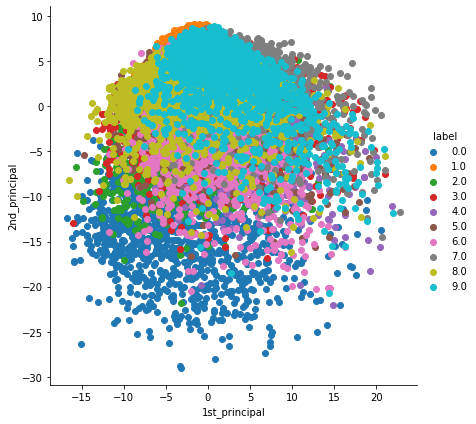

In [21]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()